In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Readign data
df=pd.read_csv("titanic.csv")


In [2]:
print(df.shape)


(714, 12)


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

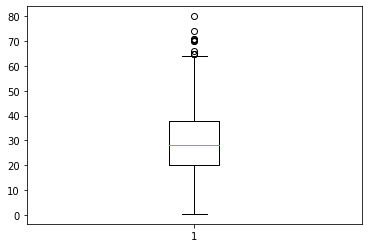

In [5]:
# For Identifying outliers

plt.boxplot(df['Age'])
plt.show()


In [6]:
# Outlier tratmentss
df[df['Age']<df['Age'].quantile(0.05)]['Age']
df[df['Age']>df['Age'].quantile(0.95)]['Age']

10     58.0
25     66.0
40     65.0
73     59.0
74     71.0
91     70.5
136    61.0
156    58.0
187    59.0
203    62.0
216    58.0
221    63.0
225    65.0
262    61.0
293    60.0
351    64.0
366    65.0
385    63.0
388    58.0
393    71.0
433    64.0
441    62.0
451    62.0
465    60.0
494    61.0
495    57.0
498    80.0
520    58.0
531    70.0
541    60.0
550    60.0
592    70.0
616    57.0
662    62.0
679    74.0
Name: Age, dtype: float64

In [7]:
# Removing outliers by capping method
df.loc[df['Age']<df['Age'].quantile(0.05),['Age']]=df['Age'].quantile(0.05)
df.loc[df['Age']>df['Age'].quantile(0.95),['Age']]=df['Age'].quantile(0.95)

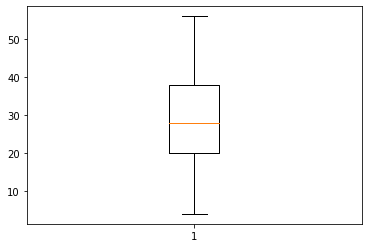

In [8]:
plt.boxplot(df['Age'])
plt.show()

In [9]:
# Binning Age - By binning method

df['age_coded']=pd.cut(df['Age'],5)
df['age_coded']

0      (14.4, 24.8]
1      (35.2, 45.6]
2      (24.8, 35.2]
3      (24.8, 35.2]
4      (24.8, 35.2]
           ...     
709    (35.2, 45.6]
710    (24.8, 35.2]
711    (14.4, 24.8]
712    (24.8, 35.2]
713    (24.8, 35.2]
Name: age_coded, Length: 714, dtype: category
Categories (5, interval[float64]): [(3.948, 14.4] < (14.4, 24.8] < (24.8, 35.2] < (35.2, 45.6] < (45.6, 56.0]]

In [10]:

# Log tranformation -- Y tranformation
df['Age-log']=df['Age'].apply(np.log)